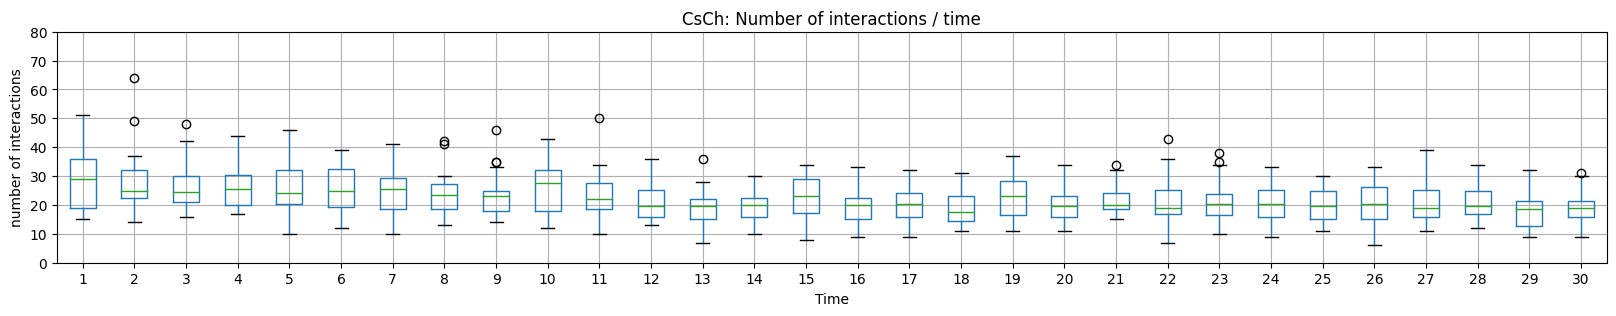

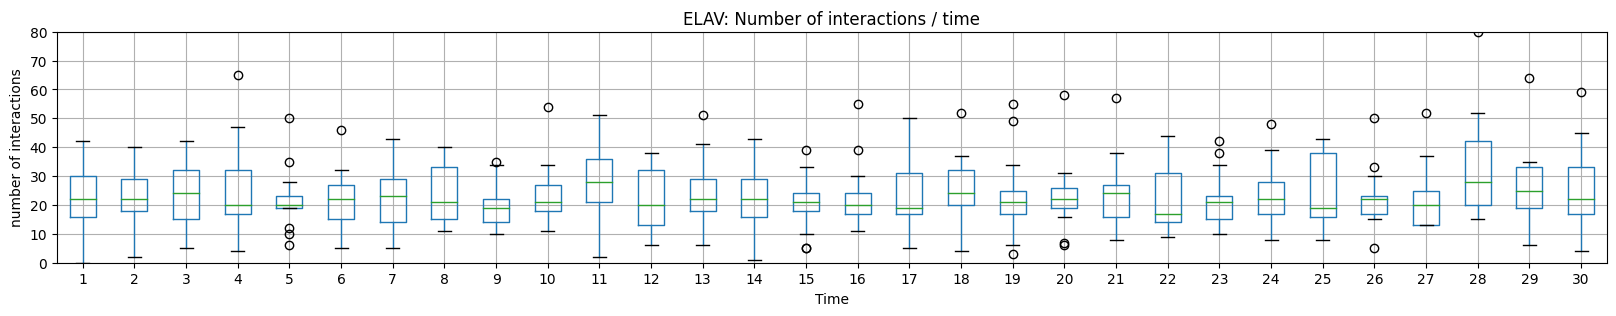

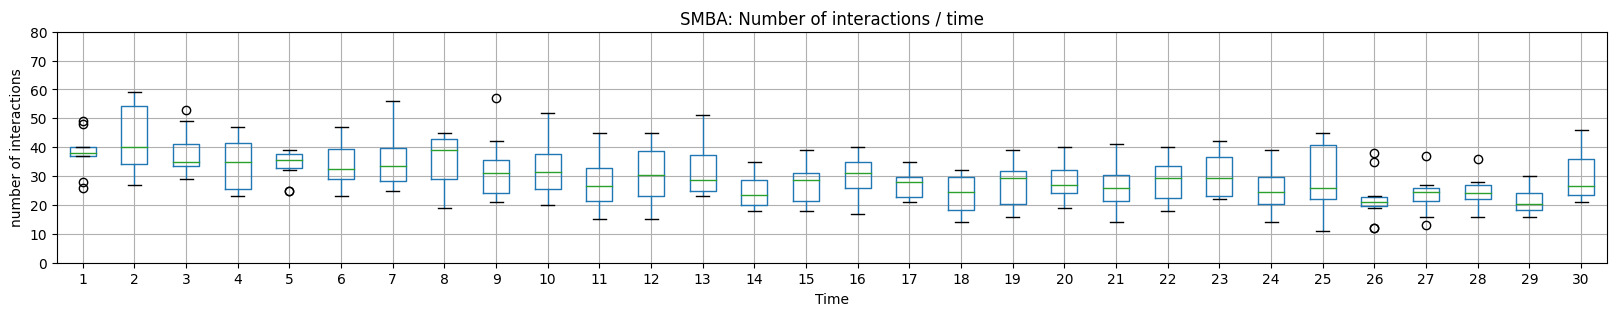

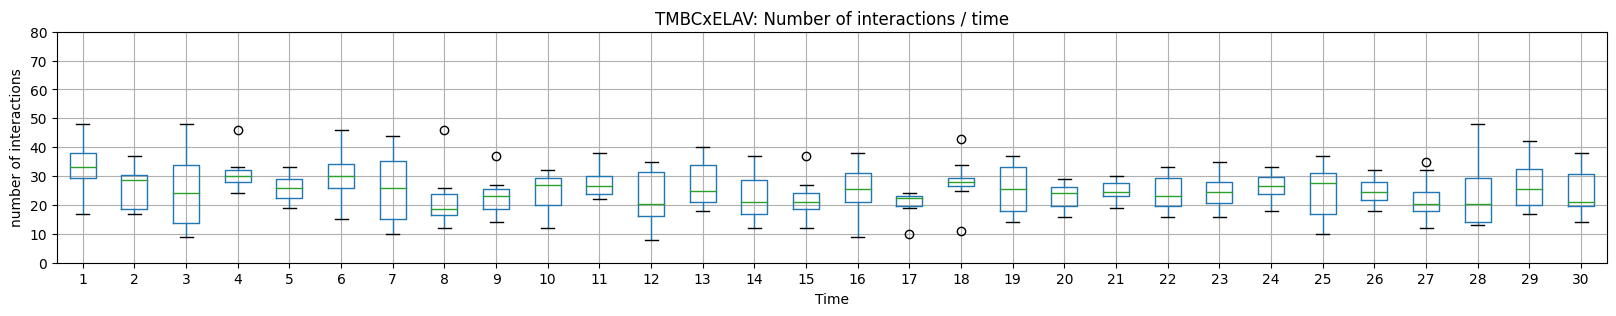

In [44]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from src.utils import fileio
import matplotlib.pyplot as plt

path = "/home/milky/drosophila-SNA/data/processed/1_0_find_interactions"
df_edges = pd.DataFrame()
df_durations = pd.DataFrame()
all_treatments = fileio.load_multiple_folders(path)

for treatment_name, treatment_path in all_treatments.items():
    treatments = fileio.load_files_from_folder(treatment_path)
    for name, path in treatments.items():
        df = pd.read_csv(path, index_col=0)
        df = df.sort_values('start_of_interaction')
        # df['node_combination'] = df.apply(lambda row: '_'.join(sorted([row['node_1'], row['node_2']])), axis=1)
        # df = df.drop_duplicates(subset=['node_combination'])
        df["snapshot"] = df['start_of_interaction'] // (1440) #
        df["snapshot"]  = df["snapshot"]+1
        unique_count = df['snapshot'].value_counts()
        unique_count = unique_count.sort_index(ascending=True)
        df_edges[name] = unique_count
        durations = df.duration.value_counts()
        df_durations[name] = durations

df_csch = df_edges.filter(like='CsCh')
df_elav = df_edges.filter(like='ELAV')
df_elav = df_elav.drop(df_edges.filter(like='TMBCxELAV').columns, axis=1)
df_tmbcxelav = df_edges.filter(like='TMBCxELAV')
df_smba = df_edges.filter(like='SMBA')

df_csch = df_csch.fillna(0)
df_elav = df_elav.fillna(0)
df_tmbcxelav = df_tmbcxelav.fillna(0)
df_smba = df_smba.fillna(0)

pops = [(df_csch, "CsCh"), (df_elav, "ELAV"), (df_smba, "SMBA"), (df_tmbcxelav, "TMBCxELAV")]

for pop, treatment in pops:
    plt.rcParams["figure.figsize"] = (20,3)
    pop.T.boxplot()
    plt.ylim(0, 80)
    plt.title(f"{treatment}: Number of interactions / time")
    plt.xlabel("Time")
    plt.ylabel("number of interactions")
    plt.show()

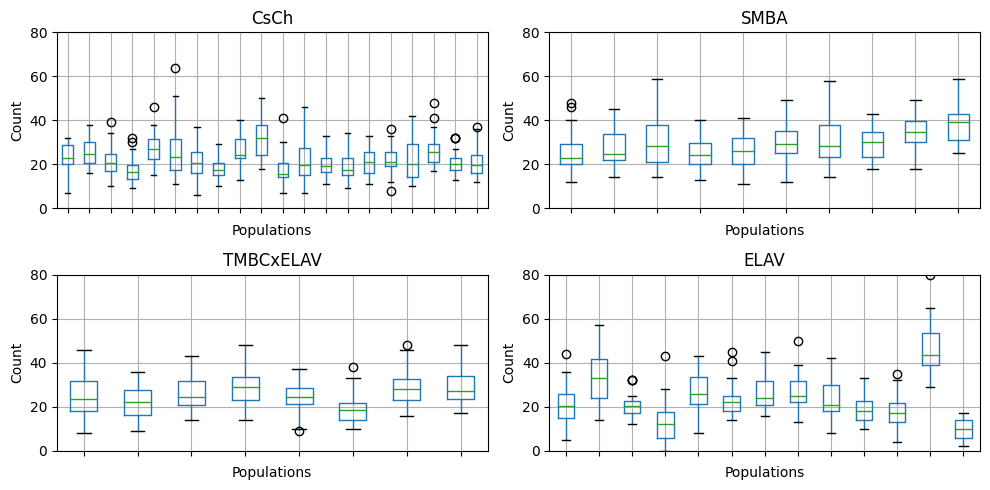

In [45]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

df_csch.boxplot(ax=axes[0, 0])
axes[0, 0].set_title("CsCh")
axes[0, 0].set_xticklabels([])
axes[0, 0].set_xlabel("Populations")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_ylim(0, 80)

df_smba.boxplot(ax=axes[0, 1])
axes[0, 1].set_title("SMBA")
axes[0, 1].set_xticklabels([])
axes[0, 1].set_xlabel("Populations")
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_ylim(0, 80)

df_tmbcxelav.boxplot(ax=axes[1, 0])
axes[1, 0].set_title("TMBCxELAV")
axes[1, 0].set_xticklabels([])
axes[1, 0].set_xlabel("Populations")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_ylim(0, 80)  

df_elav.boxplot(ax=axes[1, 1])
axes[1, 1].set_title("ELAV")
axes[1, 1].set_xticklabels([])
axes[1, 1].set_xlabel("Populations")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_ylim(0, 80)  

plt.tight_layout()
plt.show()


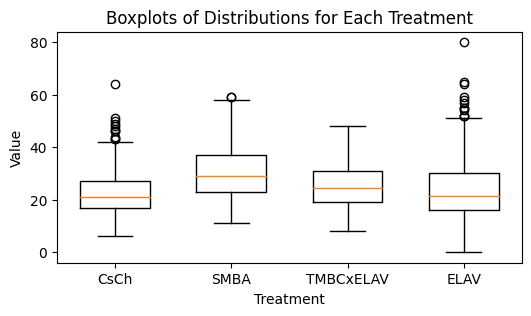

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Concatenate the columns of each DataFrame into a single Series
df_csch_concat = pd.concat([df_csch[col] for col in df_csch.columns], ignore_index=True)
df_smba_concat = pd.concat([df_smba[col] for col in df_smba.columns], ignore_index=True)
df_tmbcxelav_concat = pd.concat([df_tmbcxelav[col] for col in df_tmbcxelav.columns], ignore_index=True)
df_elav_concat = pd.concat([df_elav[col] for col in df_elav.columns], ignore_index=True)

# Create a list of data arrays for each treatment
data = [df_csch_concat, df_smba_concat, df_tmbcxelav_concat, df_elav_concat]

# Create a list of treatment names
treatments = ['CsCh', 'SMBA', 'TMBCxELAV', 'ELAV']

# Plot the boxplots
plt.figure(figsize=(6, 3))
for i in range(len(data)):
    plt.boxplot(data[i], positions=[i+1], widths=0.6)
plt.xticks(range(1, len(treatments) + 1), treatments)
plt.xlabel("Treatment")
plt.ylabel("Value")
plt.title("Boxplots of Distributions for Each Treatment")
plt.show()


**Koliko vremena treba od 0 do potpuno povezane mreze?**

In [43]:
# plt.boxplot(data[0])
# plt.show()

df_elav

,ELAV_A4_18_05_2023-10_39.csv,ELAV_A3_24_05_2023-10_37.csv,ELAV_A4_24_05_2023-11_32.csv,ELAV_A2_21_04_2023_11_08.csv,ELAV_A2_05_05_2023-10_26.csv,ELAV_A4_28_04_2023-12_10.csv,ELAV_A1_19_04_2023-12_08.csv,ELAV_A1_18_05_2023-10_39.csv,ELAV_A1_05_05_2023-10_26.csv,ELAV_A1_24_05_2023-10_37.csv,ELAV_A1_21_04_2023-11_08.csv,ELAV_A3_18_05_2023-10_39.csv,ELAV_A1_20_04_2023-11_45.csv
snapshot,,,,,,,,,,,,,
1,10,17,22,NaN,33,18,23,31,30,24,16,42,15
2,29,21,22,2.0,36,18,21,22,32,27,13,40,4
3,24,24,32,5.0,29,15,23,36,38,18,8,42,7
4,20,47,17,4.0,43,23,32,24,20,16,17,65,6
5,12,28,20,10.0,35,19,21,19,23,20,21,50,6
6,5,27,32,14.0,24,15,16,22,28,22,15,46,14
7,25,22,23,43.0,31,18,29,26,13,14,5,42,11
8,13,14,19,25.0,40,33,21,33,19,33,11,37,15
9,12,35,12,19.0,26,14,21,15,21,22,15,34,10


In [24]:
df_elav

,ELAV_A4_18_05_2023-10_39.csv,ELAV_A3_24_05_2023-10_37.csv,ELAV_A4_24_05_2023-11_32.csv,ELAV_A2_21_04_2023_11_08.csv,ELAV_A2_05_05_2023-10_26.csv,ELAV_A4_28_04_2023-12_10.csv,ELAV_A1_19_04_2023-12_08.csv,ELAV_A1_18_05_2023-10_39.csv,ELAV_A1_05_05_2023-10_26.csv,ELAV_A1_24_05_2023-10_37.csv,ELAV_A1_21_04_2023-11_08.csv,ELAV_A3_18_05_2023-10_39.csv,ELAV_A1_20_04_2023-11_45.csv
snapshot,,,,,,,,,,,,,
1,10,17,22,NaN,33,18,23,31,30,24,16,42,15
2,29,21,22,2.0,36,18,21,22,32,27,13,40,4
3,24,24,32,5.0,29,15,23,36,38,18,8,42,7
4,20,47,17,4.0,43,23,32,24,20,16,17,65,6
5,12,28,20,10.0,35,19,21,19,23,20,21,50,6
6,5,27,32,14.0,24,15,16,22,28,22,15,46,14
7,25,22,23,43.0,31,18,29,26,13,14,5,42,11
8,13,14,19,25.0,40,33,21,33,19,33,11,37,15
9,12,35,12,19.0,26,14,21,15,21,22,15,34,10


**Broj interakcija po snapshotu**

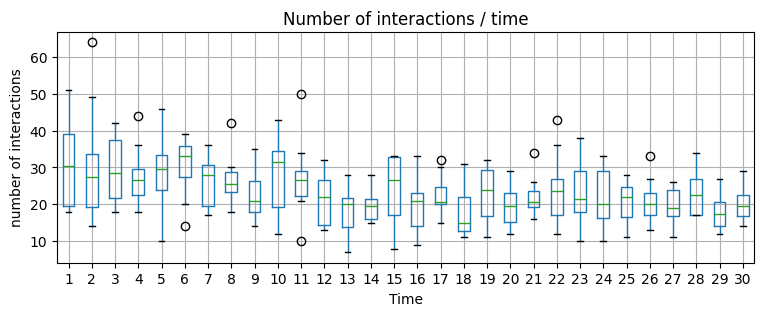

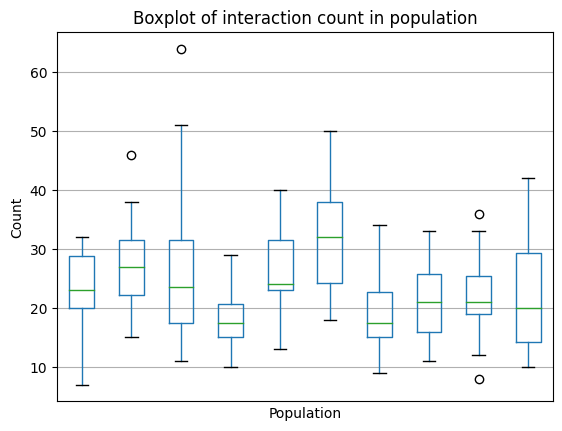

In [20]:
snapshot_graphs = []
for i in range(1, 11):
    filtered_df = df[df['snapshot'] == i]
    G = nx.DiGraph()

    nodes = ['fly' + str(i) for i in range(1, 13)]
    G.add_nodes_from(nodes) 

    for _, row in filtered_df.iterrows():
        node_1 = row['node_1']
        node_2 = row['node_2']
        duration = row['duration']
        count=1

        if G.has_edge(node_1, node_2):
            count += G[node_1][node_2]['count']
            duration += duration

        else:
            G.add_edge(node_1, node_2, count=count, duration=duration)
    
    snapshot_graphs.append(G)

In [ ]:
plot_graphs = snapshot_graphs #[:8]

num_rows = 6
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))
axes = axes.flatten()

g_density = []
degrees_list = []
# Iterate over the graphs and plot them
for i, graph in enumerate(plot_graphs):
    # Generate circular layout positions for the nodes
    layout_positions = nx.circular_layout(graph)

    out_degrees = dict(graph.out_degree())
    degrees_list.append(out_degrees)

    node_sizes = [250 * (out_degrees[node] + 1) for node in graph.nodes()]

    # Plot the graph using the circular layout positions
    ax = axes[i]
    ax.set_title(f'Graph {i+1}')
    nx.draw(graph, pos=layout_positions, with_labels=True, node_color='lightblue', node_size=node_sizes, edge_color='gray', arrowsize=10, ax=ax)

    # Calculate the density of the graph
    graph_density = nx.density(graph)
    g_density.append(graph_density)
    # Add density value as a text annotation under the graph
    ax.text(0.5, -0.1, f'Density: {graph_density:.3f}', transform=ax.transAxes, ha='center')

# Hide the remaining empty subplots
for j in range(len(plot_graphs), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [100]:
g_density_1 = g_density

In [32]:

in_values = []
out_values = []

for graph in snapshot_graphs:
    in_degree = graph.in_degree()
    out_degree = graph.out_degree()

    print(in_degree.values())
    in_values.append(in_degree)
    out_values.append(out_degree)


AttributeError: 'InDegreeView' object has no attribute 'values'

In [29]:
d_in = {}
for i, in_v in enumerate(in_values):
    in_degrees = list(in_v.values())

    d_in.update({i: in_degrees})

d_out = {}
for i, out_v in enumerate(out_values):
    out_degrees = list(out_v.values())

    d_out.update({i: out_degrees})

AttributeError: 'InDegreeView' object has no attribute 'values'

Text(0.5, 1.0, 'Out degree centrality')

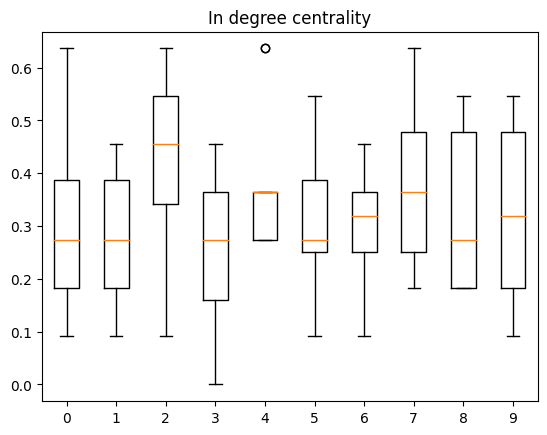

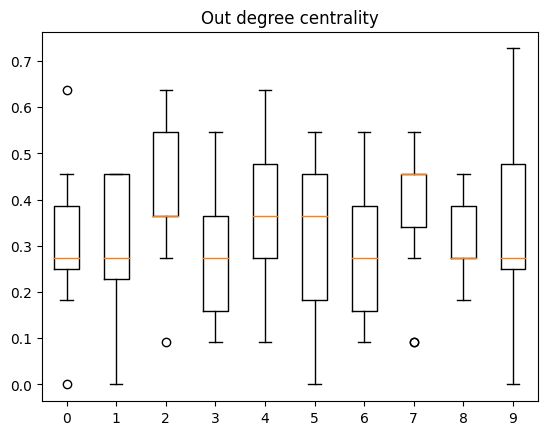

In [27]:
fig, ax = plt.subplots()
ax.boxplot(d_in.values())
ax.set_xticklabels(d_in.keys())
ax.set_title("In degree centrality")

fig, ax = plt.subplots()
ax.boxplot(d_out.values())
ax.set_xticklabels(d_out.keys())
ax.set_title("Out degree centrality")